In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
plt.style.use('ggplot')

In [3]:
df=pd.read_csv('Ecommerce Customers.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


Text(0, 0.5, 'Time on App')

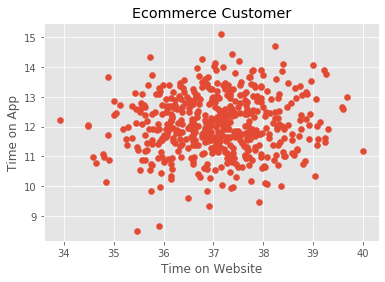

In [4]:
fig,ax=plt.subplots()
ax.scatter(df['Time on Website'],df['Time on App'])
ax.set_title('Ecommerce Customer')
ax.set_xlabel('Time on Website')
ax.set_ylabel('Time on App')

**from this graph we can see as there is more scatter between 'Time on website' and ' Time on App' then we can conclude that there is no correlation between them**

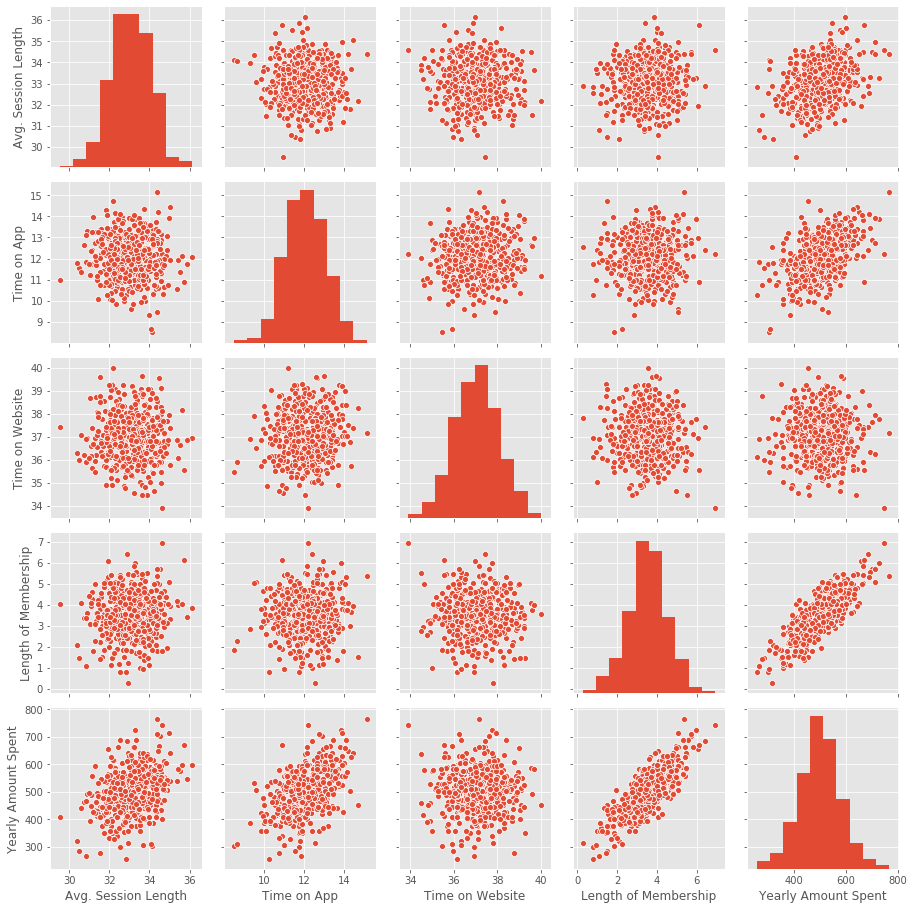

In [5]:
sns.pairplot(df)

**From this Graph it can be seen that scatter between the Yearly Amount Spent and Length Of membership is minimun Than the others, i.e from this we can conclude that there is positive correlation between them.**

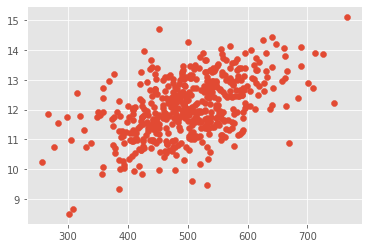

In [6]:
plt.scatter(df['Yearly Amount Spent'],df['Time on App'])

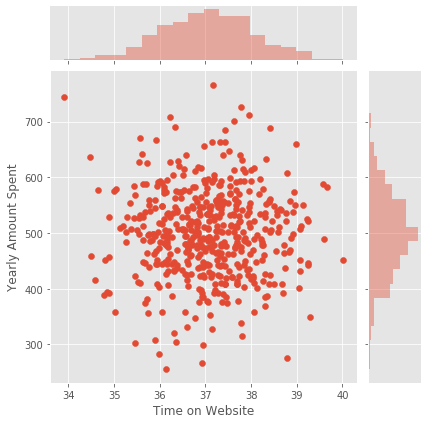

In [7]:
sns.jointplot(df['Time on Website'],df['Yearly Amount Spent'])

In [8]:
#sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

**KNN Regression**

In [9]:
x=df.iloc[:,3:7]
y=df.iloc[:,7:8]

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
#Splitting data into training and testing dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=4)

#Fitting
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [11]:
from sklearn import metrics
import math
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MSE: 549.9467849460153
RMSE: 23.450944222909563


**Simple Linear regression**

In [12]:
x1=df.iloc[:,6:7]
y1=df.iloc[:,7:8]

In [13]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.30,random_state=4)

In [14]:
from sklearn.linear_model import LinearRegression
linear_regressor=LinearRegression()
linear_regressor.fit(x1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print("Intercept:",linear_regressor.intercept_)
print("Coefficient:",linear_regressor.coef_)

Intercept: [271.36156622]
Coefficient: [[64.46468318]]


In [16]:
y1_pred=linear_regressor.predict(x1_test)

In [17]:
from sklearn import metrics
import math
print('MSE:',metrics.mean_squared_error(y1_test,y1_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y1_test,y1_pred)))

MSE: 2247.391605744327
RMSE: 47.40666203967884


**Multiple Linear Regression**

In [18]:
x2=pd.DataFrame(df,columns=['Time on App','Avg. Session Length'])
y2=df.iloc[:,7:8]

In [19]:
from sklearn.model_selection import train_test_split
#Splitting data into training and testing dataset
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.30,random_state=4)

In [20]:
from sklearn.linear_model import LinearRegression
linear_regressor1=LinearRegression()
linear_regressor1.fit(x2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
print("Intercept:",linear_regressor1.intercept_)
print("Intercept:",linear_regressor1.coef_)

Intercept: [-960.75725346]
Intercept: [[41.02867702 29.22666144]]


In [22]:
y2_pred=linear_regressor1.predict(x2_test)

In [23]:
from sklearn import metrics
import math
print('MSE:',metrics.mean_squared_error(y2_test,y2_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y2_test,y2_pred)))

MSE: 3460.688018680051
RMSE: 58.82761272293863


**From all 3 anlysis MSE for KNN regression is minimun i.e KNN regression gives the best fitted model then other two**